Initial Data:
   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40

Outlier Count (IQR Method):
Age: 0
Annual Income (k$): 2
Spending Score (1-100): 0


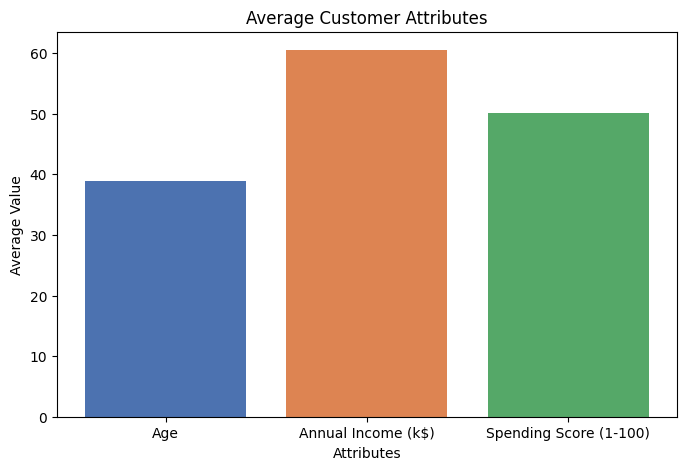

C:\Users\MANOJ KUMAR T\AppData\Local\Temp\ipykernel_16692\664064377.py:76: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


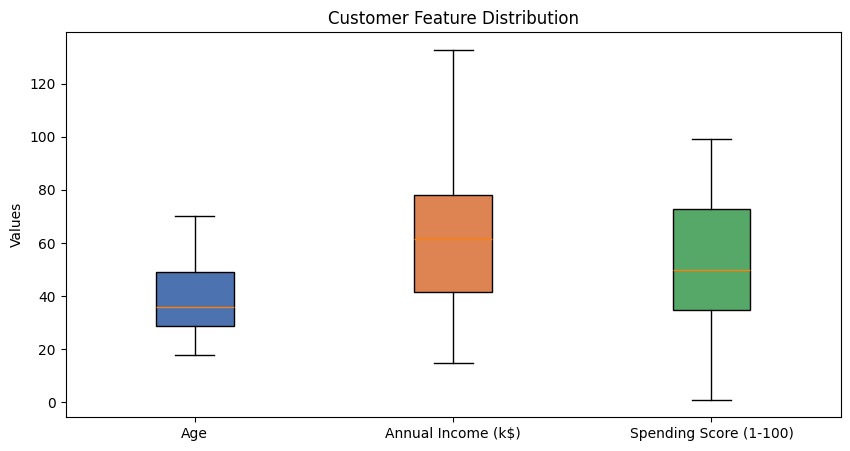

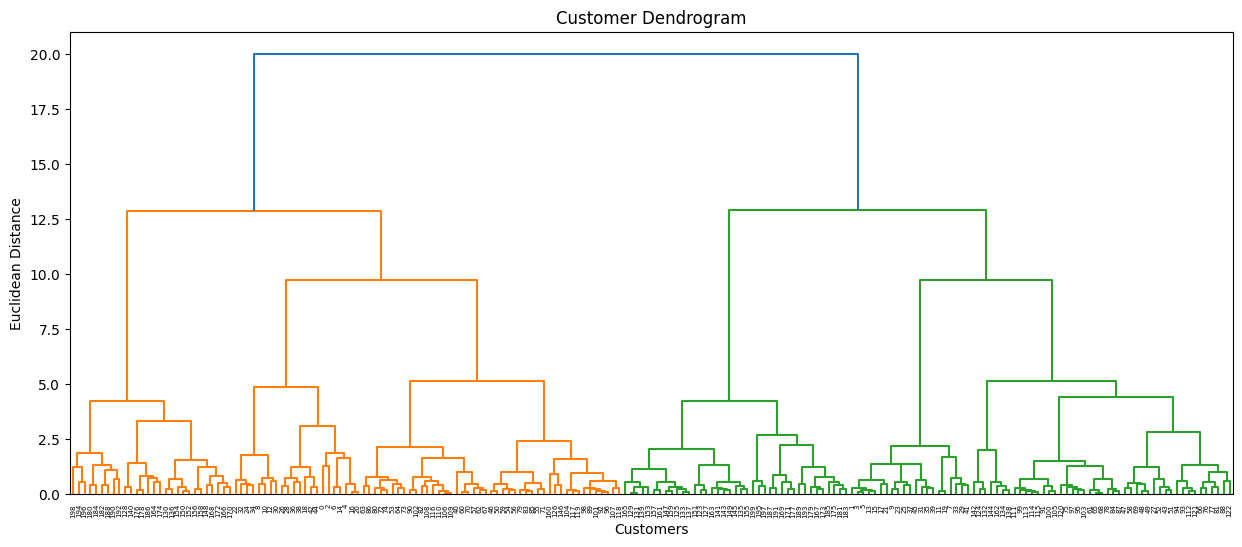

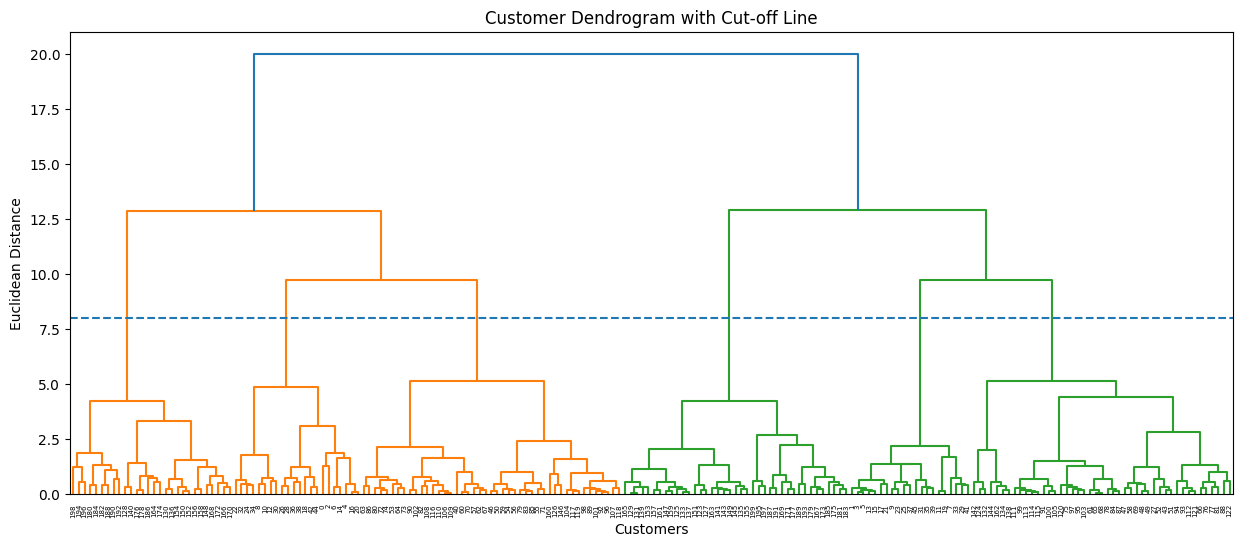

In [8]:
# =========================================================
# Customer Segmentation using Hierarchical Clustering
# =========================================================

# 1. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# ---------------------------------------------------------
# 2. Load dataset
# ---------------------------------------------------------
df = pd.read_csv("ML470_S7_MallCustomers_Data_Concept.csv")

# Select numerical features
data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

print("Initial Data:")
print(data.head())

# ---------------------------------------------------------
# 3. Outlier detection (IQR method)
# ---------------------------------------------------------
def assess_outliers(df):
    print("\nOutlier Count (IQR Method):")
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        count = ((df[col] < lower) | (df[col] > upper)).sum()
        print(f"{col}: {count}")

assess_outliers(data)

# ---------------------------------------------------------
# 4. Outlier treatment (capping)
# ---------------------------------------------------------
def treat_outliers(df):
    df_new = df.copy()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_new[col] = np.clip(df[col], lower, upper)
    return df_new

data_treated = treat_outliers(data)

# ---------------------------------------------------------
# 5. BAR CHART – Average customer attributes (Colored)
# ---------------------------------------------------------
mean_values = data_treated.mean()

plt.figure(figsize=(8, 5))
plt.bar(
    mean_values.index,
    mean_values.values,
    color=['#4C72B0', '#DD8452', '#55A868']
)
plt.title("Average Customer Attributes")
plt.xlabel("Attributes")
plt.ylabel("Average Value")
plt.show()

# ---------------------------------------------------------
# 6. BOX PLOT – Feature distribution (Colored)
# ---------------------------------------------------------
plt.figure(figsize=(10, 5))

box = plt.boxplot(
    [
        data_treated['Age'],
        data_treated['Annual Income (k$)'],
        data_treated['Spending Score (1-100)']
    ],
    labels=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
    patch_artist=True
)

colors = ['#4C72B0', '#DD8452', '#55A868']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title("Customer Feature Distribution")
plt.ylabel("Values")
plt.show()

# ---------------------------------------------------------
# 7. Feature scaling
# ---------------------------------------------------------
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_treated)

# ---------------------------------------------------------
# 8. Hierarchical clustering dendrogram
# ---------------------------------------------------------
linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(15, 6))
dendrogram(linked)
plt.title("Customer Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

# ---------------------------------------------------------
# 9. Dendrogram with distance cut-off line
# ---------------------------------------------------------
plt.figure(figsize=(15, 6))
dendrogram(linked)
plt.axhline(y=8, linestyle='--')
plt.title("Customer Dendrogram with Cut-off Line")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()
